# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')
sns.set()
plt.rcParams['figure.figsize'] = [10, 5]
np.random.seed(728)

#### 1.  Is the distribution of body temperatures normal?

One way to determine if the distribution of body temperatures is likely normal is graphically.  In the first graph, we have a histogram of the temperatures from the dataset.  It appears that this distribution is roughly symmetric, unimodal, and bell-shaped with no obvious outliers, suggesting that the sample did come from a normal population.  However, histograms can be misleading as you can regularly change the size or number of bins to influence the shape of the graph.

In the second graph, I created an empirical cumulative density graph for our observed temperature data as well as what a normal curve should look like with the same mean and standard deviation as the sample.  As the two curves look very close to each other with only slight variations, this graph supports our earlier hypothesis that this sample of body temperatures likely came from a normal distribution.

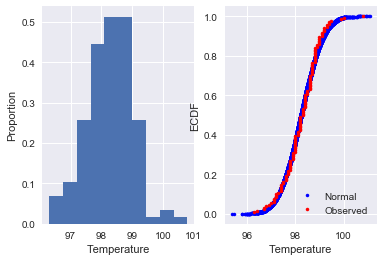

In [2]:
#Create histogram to visualize the distribution of the data
plt.subplot(1,2,1)
plt.hist(df.temperature, bins=10, density=True)
plt.xlabel('Temperature')
plt.ylabel('Proportion')

#Create function to calculate the empirical cumulative density function (ecdf)
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1)/n
    
    return x,y


plt.subplot(1,2,2)
#Take a random sample using the mean(mu) and standard deviation(sigma) from the sample of human body temperatures.
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
n = len(df.temperature)
sample = np.random.normal(sample_mean, sample_std, 10000)

#Plot ecdf of a normal distribution with mean and standard deviation same as the sample
x_norm, y_norm = ecdf(sample)
_ = plt.plot(x_norm, y_norm, marker='.', linestyle='none', color='b')

#Plot ecdf of sample data.
x_temp, y_temp = ecdf(df.temperature)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none', color='r')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Normal', 'Observed'), loc='lower right')
plt.show()

Another common way to check if a distribution likely came from a normal distribution is the Shapiro-Wilk test.  Because our P-value is relatively high as can be seen above, there is not statistically significant evidence to suggest that the distribution didn't come from a normal distribution.

In [3]:
W, p = st.shapiro(df.temperature)
print('Results of Shapiro-Wilk test for normality:\n' +
      'Test statistic W = {} \n'.format(W) +
      'P-value = {}'.format(p) )

Results of Shapiro-Wilk test for normality:
Test statistic W = 0.9865769743919373 
P-value = 0.2331680953502655


### 2. Is the sample size large? Are the observations independent?

A sample size of 130 measurements is sufficiently large.

Because the population size of all adults is substantially larger (at least 10 times) the size fo the sample, it is safe to assume that the observations are independent of one another (that is that the selection of one person's body temperature does not impact the next selection of a person's body temperature).

In [4]:
#Checking size of the sample
print('There are {} measurements of body temperature in this dataset.'.format(len(df.temperature)))

There are 130 measurements of body temperature in this dataset.


### 3. Is the true population mean really 98.6 degrees F?
##### Bootstrap Hypothesis Test
Even with 100,000 replications, there were no occurrences of an average body temperature as low or lower than the averaged we observed in our sample (as can be seen by the calculation fo the P-value as 0).  This is statistically significant evidence to suggest that the mean body temperature is actually lower than 98.6 degrees Fahrenheit.

In [5]:
#Bootstrap hypothesis test if the true population mean is really 98.6 degrees Fahrenheit
translated_temp = df.temperature - np.mean(df.temperature) + 98.6

#Initialize array of replicates.  Then generate replicates of the translated_temp.
bs_replicates = np.empty(100000)

#Create 100000 replicates.
for i in range(100000):
    bs_replicates[i]= np.mean(np.random.choice(translated_temp, size=len(df.temperature)))
    
#Calculate the empirical probability of finding an average temperature as low or lower
p = np.sum(bs_replicates <= np.mean(df.temperature)) /len(bs_replicates)
print('P-value is approximately {}'.format(p))

P-value is approximately 0.0


##### Frequentist Statistical Test
In this situation, we should use a one-sample hypothesis test with a t test statistic because we have a single sample of body temperatures and we only have the sample mean and standard deviation as estimates for the populatin parameters.

In both cases, the p-value is also incredibly small and supports our previous conclusion that there is statistically significant evidence that the true mean body temperature is actually lower than 98.6 degrees Fahrenheit.

However, why are our results substantially different when we use a t-distribution instead of the normal distribution.  This arises from the use of the sample mean and standard deviation as estimators of the population mean and standard deviation.  The t-distribution compensates for the variability in the sample values by having more probability for the extreme values, especially for small sample sizes.

In [6]:
statistic = (sample_mean - 98.6)/(sample_std / np.sqrt(n))
p_t = st.t.cdf(statistic, df = n-1)
print('Results of 1-sample t-test for means:\n' +
      'Test statistic t = {} \n'.format(statistic) +
      'P-value = {}'.format(p_t))

Results of 1-sample t-test for means:
Test statistic t = -5.475925202078116 
P-value = 1.0943732312047587e-07


In [7]:
p_z = st.norm.cdf(statistic)
print('Results of 1-sample z-test for means:\n' +
      'Test statistic z = {} \n'.format(statistic) +
      'P-value = {}'.format(p_z))

Results of 1-sample z-test for means:
Test statistic z = -5.475925202078116 
P-value = 2.1761575829410943e-08


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
The correct method to use would be the t-distribution as we do not have the population mean and standard deviation, and must use the sample mean and standard deviation as our best estimations.

Again, we see that the p-value for the t-distribution is significantly larger than for the normal distribution.  However, the different was not as pronounced when I had a larger sample size.  This suggests to me that the t-distribution is less like the normal distribution for smaller sample sizes.

In [8]:
#Draw a sample of size n=10 without replacement
sample = np.random.choice(df.temperature, size=10, replace=False)

statistic_sample10 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))
p_t10 = st.t.cdf(statistic_sample10, df=10-1)

print('Results of 1-sample t-test for means:\n' +
      'Test statistic t = {} \n'.format(statistic_sample10) +
      'P-value = {}'.format(p_t10))

Results of 1-sample t-test for means:
Test statistic t = -0.47673129462270053 
P-value = 0.32245775673245625


In [9]:
p_z10 = st.norm.cdf(statistic_sample10)

print('Results of 1-sample z-test for means:\n' +
      'Test statistic z = {} \n'.format(statistic_sample10) +
      'P-value = {}'.format(p_z10))

Results of 1-sample z-test for means:
Test statistic z = -0.47673129462270053 
P-value = 0.3167767376884507


### 5.  At what temperature should we consider someone's temperature to be abnormal?
Depending on which method you use, you get substantially different responses.  Using the bootstrap method, anything outside the range of 96.7 to 99.5 degrees Fahrenheit would be considered abnormal.  Using the frequentist method, anything outside the range of 88.97 to 107.5 degrees Fahrenheit would be considered abnormal.  The bootstrap method seems to be more reliable for confidence intervals of size = 1.

In [10]:
#Initialize array of replicates.
bs_replicates = np.empty(10000)

#Create 10000 replicates.
for i in range(10000):
    bs_replicates[i]= np.random.choice(df.temperature, size=1)
    
#Compute 95% confidence interval from replicates
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('Using the bootstrap method, a 95% confidence interval for body temperature is {} degrees Fahrenheit.'.format(conf_int))

Using the bootstrap method, a 95% confidence interval for body temperature is [96.7 99.5] degrees Fahrenheit.


In [11]:
t_critical = st.t.ppf(.975,1)

conf_int = [sample_mean - t_critical*sample_std, sample_mean + t_critical*sample_std]

print('Using the frequentist method, a 95% confidence interval for body temperature is {} degrees Fahrenheit.'.format(conf_int))

Using the frequentist method, a 95% confidence interval for body temperature is [88.96915529961757, 107.52930623884399] degrees Fahrenheit.


### 6. Is there a significant difference between males and females in normal temperature?
I opted to use the bootstrap method to perform this calculation, because it gave me the opportunity to practice some of my coding skills in Python.  It also seems like this method can be used in a lot more situations than the frequentist methods.

Because the p-value is small, there is statistically significant evidence to suggest that the average body temperature for a man is lower than the average body temperature for a woman.  

In [12]:
males = df.loc[df.gender == 'M']
females = df.loc[df.gender == 'F']

In [13]:
males_shifted = males.temperature - np.mean(males.temperature) + sample_mean
females_shifted = females.temperature - np.mean(females.temperature) + sample_mean

male_replicates=np.empty(10000)
female_replicates = np.empty(10000)

for i in range(10000):
    male_replicates[i] = np.mean(np.random.choice(df.temperature, size=len(df.temperature)))
    female_replicates[i] = np.mean(np.random.choice(df.temperature, size=len(df.temperature)))
    
difference_replicates = male_replicates - female_replicates

p = np.sum(difference_replicates < (np.mean(males.temperature) - np.mean(females.temperature))) / len(male_replicates)

print('The P-value is: {}'.format(p))

The P-value is: 0.0007
